In [3]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 418.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 644.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 985.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 26.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 22.0 MB/s eta 0:00:00:00:01


In [1]:
import pdfplumber

In [2]:
def find_suitable_image_size(page):
    """Per PDF Page to Image"""
    page_width = page.width
    page_height = page.height
    
    # Calculate the aspect ratio of the PDF page
    aspect_ratio = page_width / page_height

    # Define the accepted aspect ratios and corresponding image sizes
    accepted_ratios = {
        (1, 1): (1092, 1092),
        (3, 4): (951, 1268),
        (2, 3): (896, 1344),
        (9, 16): (819, 1456),
        (1, 2): (784, 1568)
    }

    # Find the most suitable aspect ratio
    closest_ratio = min(accepted_ratios.keys(), key=lambda x: abs(aspect_ratio - (x[0] / x[1])))
    suitable_ratio = accepted_ratios[closest_ratio]
    
    desired_width = suitable_ratio[0]
    desired_height = suitable_ratio[1]
    
    dpi_x = desired_width / page_width * 72
    dpi_y = desired_height / page_height * 72 
    dpi = min(dpi_x, dpi_y)
    
    # Print the calculated DPI
    print(f"Calculated DPI: {dpi:.2f}")
    
    # Convert the page to an image
    image = page.to_image(resolution=int(dpi))
    image.save('output_image.png')

    return suitable_ratio

In [3]:
document = "../data/User_Manual_W11_Acer_1.0_A_A_SHORT.pdf"
pdf_obj = pdfplumber.open(document)
page = pdf_obj.pages[0]

suitable_image_size = find_suitable_image_size(page)
print(f"The most suitable image size is: {suitable_image_size[0]}x{suitable_image_size[1]} pixels")

Calculated DPI: 153.60
The most suitable image size is: 896x1344 pixels


In [4]:
im = page.to_image()

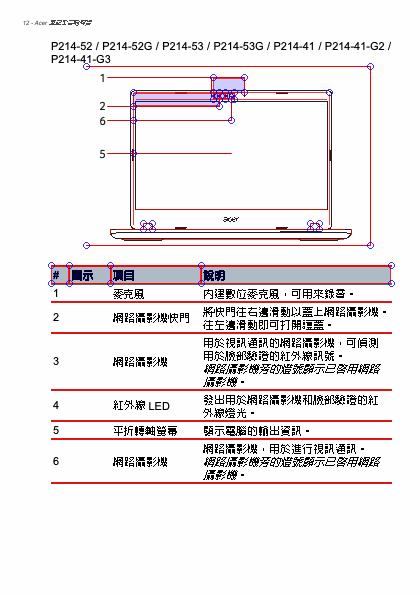

In [5]:
im.reset().debug_tablefinder()

In [6]:
text = page.extract_text(
    layout=True, 
)
print(text)

                                                          
                                                          
   12 - Acer 筆記型電腦導覽                                      
       P214-52 / P214-52G / P214-53 / P214-53G / P214-41 / P214-41-G2 /
       P214-41-G3                                         
                                                          
              1                                           
                                                          
              2                                           
              6                                           
                                                          
              5                                           
                                                          
                                                          
                                                          
                                                          
                                           